# A series Data capturede in a different time intervel 

The first step on our journey is to identify the three components of time series data:

* Trend
* Seasonality
* Residuals
* level

In [ ]:
#Trend, as its name suggests, is the overall direction of the data.
#Seasonality is a periodic component
#Residuals are random fluctuations. You can think of them as a noise component.

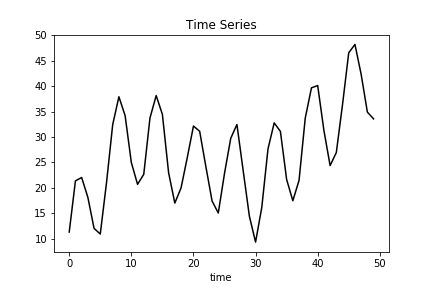

In [22]:
from IPython.display import Image
Image(filename='timeseries.png') 

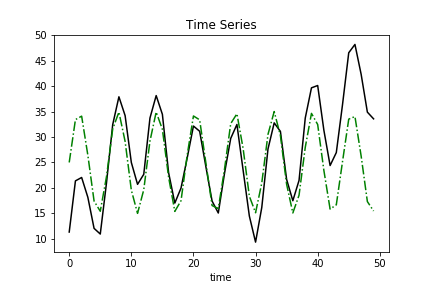

In [23]:
Image('seasonal_component.png')

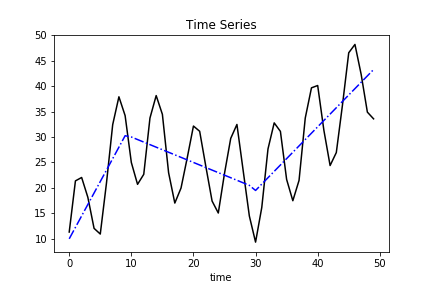

In [24]:
Image('trend_component.png')

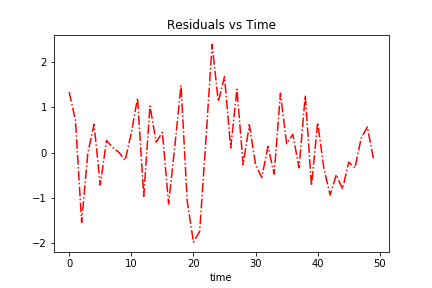

In [25]:
Image('residuals.png')

# Create Time Series Data

Time series data is data that is measured at equally-spaced intervals. Think of a sensor that takes measurements every minute.

In [26]:
import numpy as np
time = np.arange(50)

# Sticking with the sensor example, suppose the sensor is oriented towards an oscillating fan that alternates right and left. The trend component captures the wind speed as someone adjusts the fan speed. Increased fan speed translates to increased sensor measurements.



In [27]:
trend = np.empty_like(time, dtype='float')
for t in time:
    if t < 10:
        trend[t] = t * 2.25 
    elif t < 30:
        trend[t] = t * -0.5 + 25
    else:
        trend[t] = t * 1.25 - 28

Text(0, 0.5, 'sensor measurement')

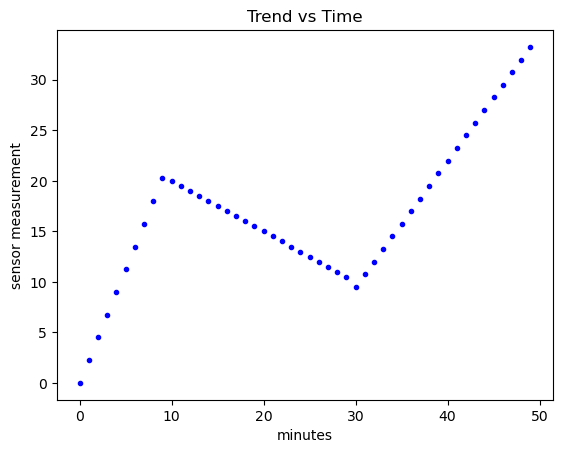

In [28]:
import matplotlib.pyplot as plt
plt.plot(time, trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("sensor measurement")

# The next step is to create a periodic element. The wind speed sensor analog is the wind speed that’s captured as the fan sweeps left to right and back again.

Here’s an example of how we can create that:

In [29]:
seasonal = 10 + np.sin(time) * 10

Text(0, 0.5, 'sensor measurement')

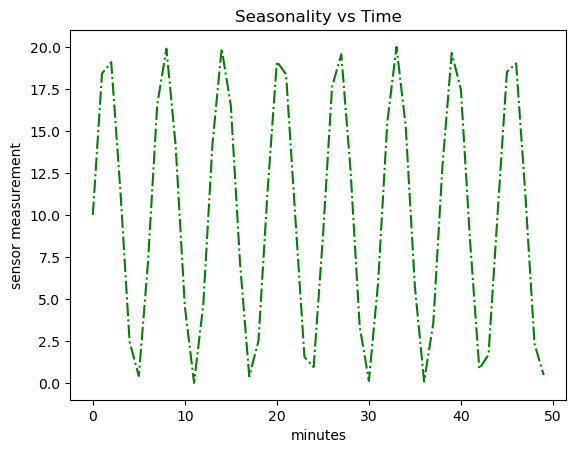

In [30]:
plt.plot(time, seasonal, 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("minutes")
plt.ylabel("sensor measurement")

In [31]:
np.random.seed(10)  ## reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

Text(0, 0.5, 'electricity demand')

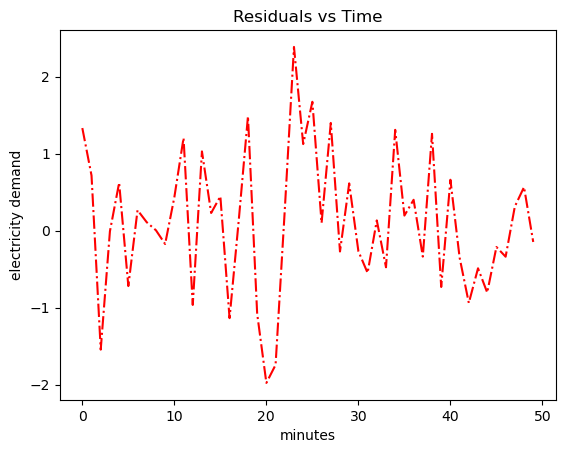

In [32]:
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand")

# additive = trend + seasonal + residual

In [34]:
additive = trend + seasonal + residual

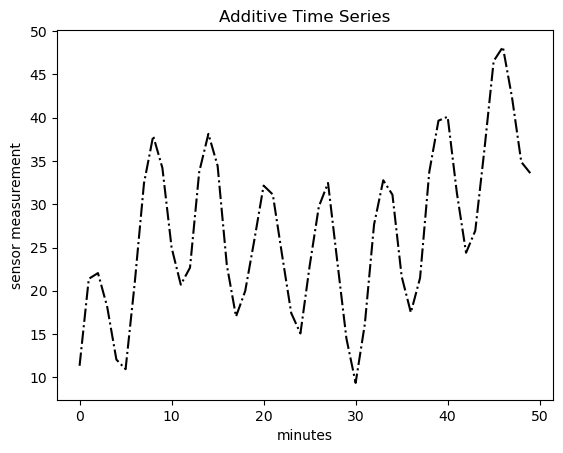

In [35]:
plt.plot(time, additive, 'k-.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("sensor measurement");

# multiplicative = trend * seasonal * residual

In [36]:
# ignore residual to make pattern obvious
ignored_residual = np.ones_like(residual)
multiplicative = trend * seasonal * ignored_residual

Text(0, 0.5, 'sensor measurement')

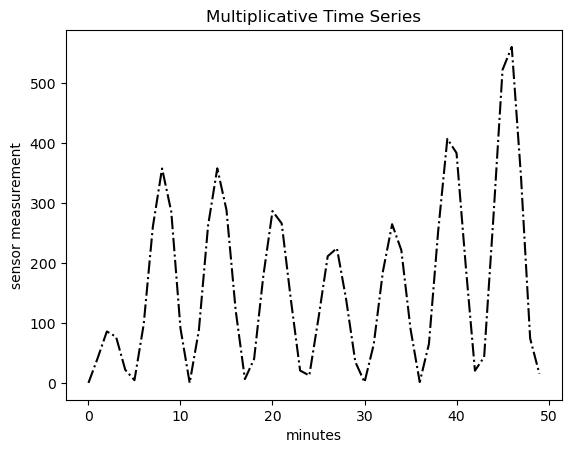

In [37]:
plt.plot(time, multiplicative, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("sensor measurement")

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from pylab import rcParams
rcParams['figure.figsize']=20,5


In [55]:
import warnings 
warnings.filterwarnings('ignore')

In [62]:
df=pd.read_csv('Electric_Production.csv',header=0,index_col=0)

In [63]:
df.shape

(397, 1)

In [64]:
df

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151
...,...
09-01-2017,98.6154
10-01-2017,93.6137
11-01-2017,97.3359


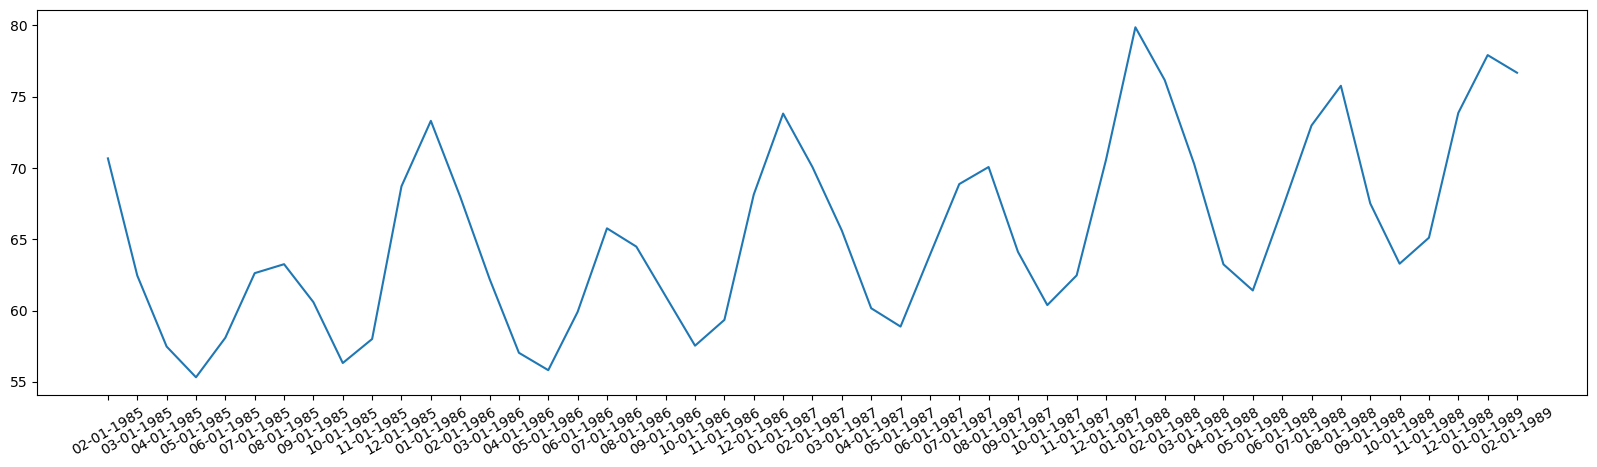

In [65]:
#moving average 
plt.plot(df[1:50]['Value'])
plt.xticks(rotation=30)
plt.show()

In [66]:
#rolling avarage 
roll=df[1:50].rolling(window=3)

roll_mean=roll.mean()

print(roll_mean.head())

                Value
DATE                 
02-01-1985        NaN
03-01-1985        NaN
04-01-1985  63.531200
05-01-1985  58.412233
06-01-1985  56.958967


<AxesSubplot:xlabel='DATE'>

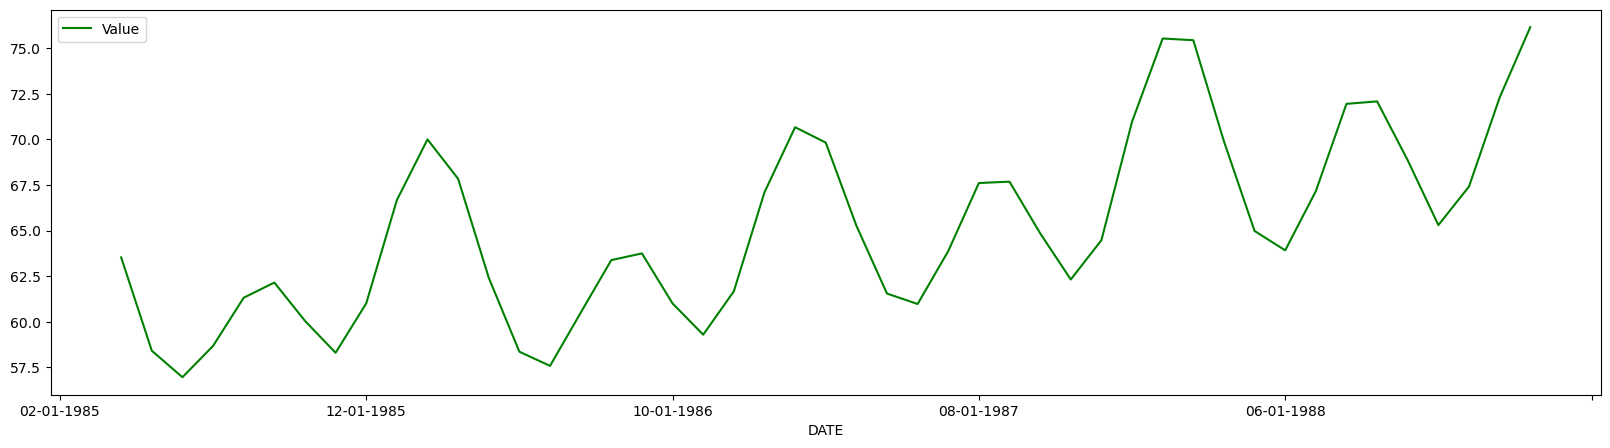

In [70]:
#plot
roll_mean.plot(color='green')

In [81]:
#simple exponential smoothing
data=df[1:50]

fit1=SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)

fit2=SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

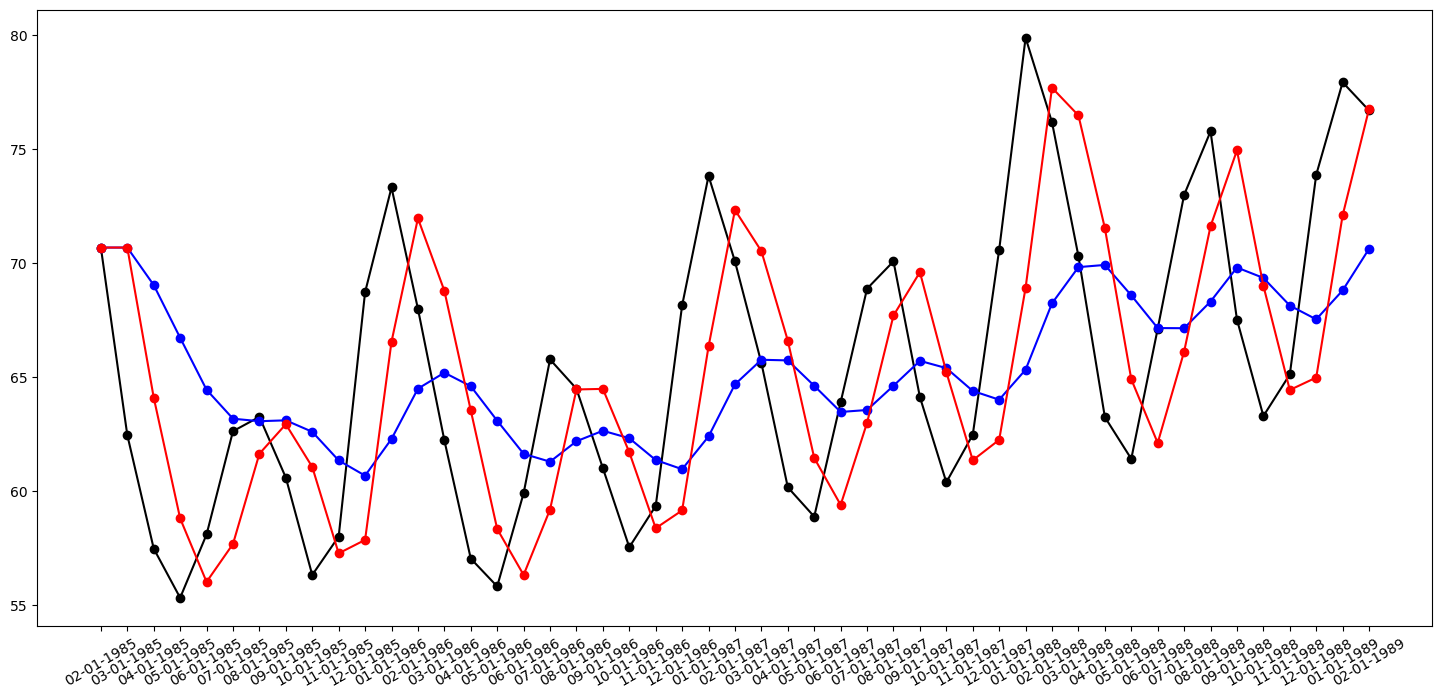

In [82]:
plt.figure(figsize=(18,8))
plt.plot(df[1:50],marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='blue')

plt.plot(fit2.fittedvalues,marker='o',color='red')


In [76]:
fit1=Holt(data).fit()

fit2=Holt(data, exponential=True).fit()

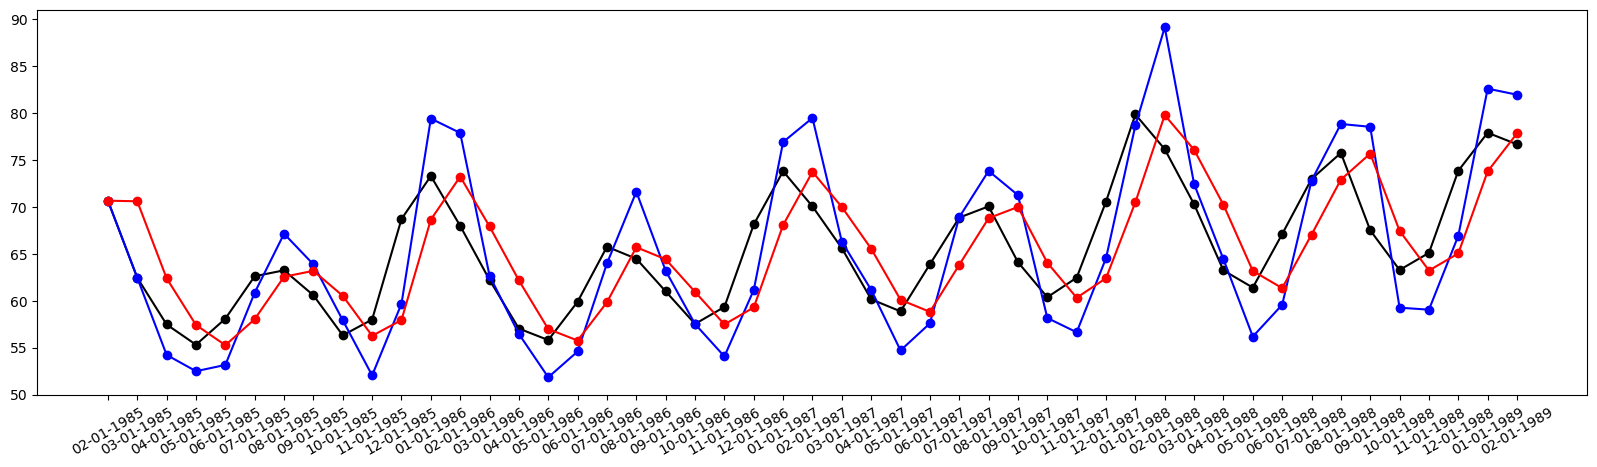

In [77]:

plt.plot(df[1:50],marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='blue')

plt.plot(fit2.fittedvalues,marker='o',color='red')